In [35]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [36]:
%matplotlib inline
import numpy as np

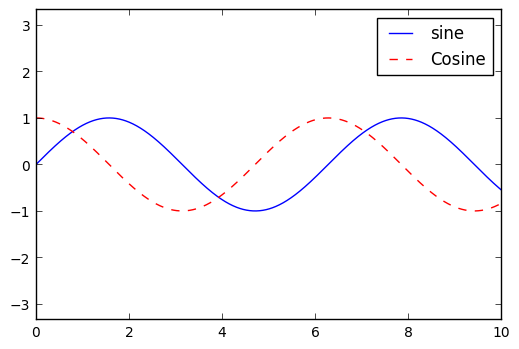

In [37]:
x = np.linspace(0,10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

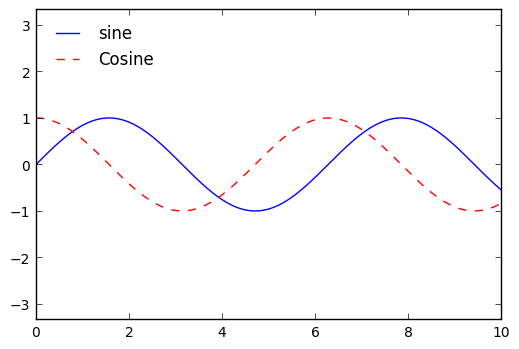

In [38]:
# change positionand turn off frame
ax.legend(loc='upper left', frameon=False)
fig

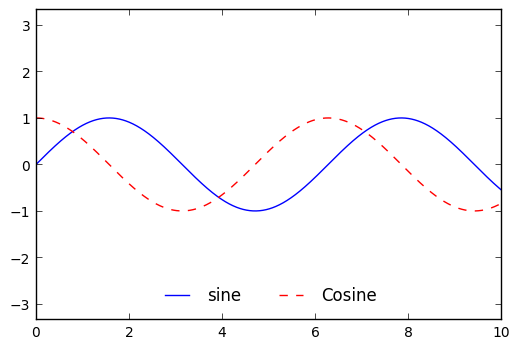

In [39]:
ax.legend(frameon=False,loc='lower center', ncol=2)
fig

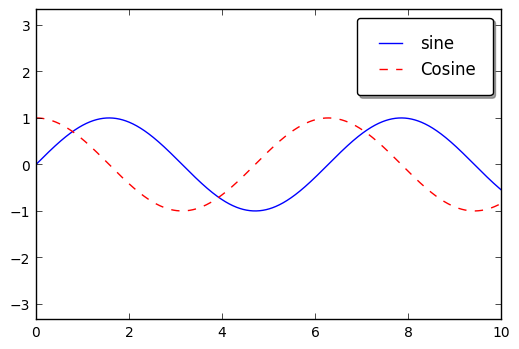

In [40]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=True)
fig

In [45]:
x.shape

(1000,)

In [46]:
x[:, np.newaxis].shape

(1000, 1)

### Choosing Elements for the Legend

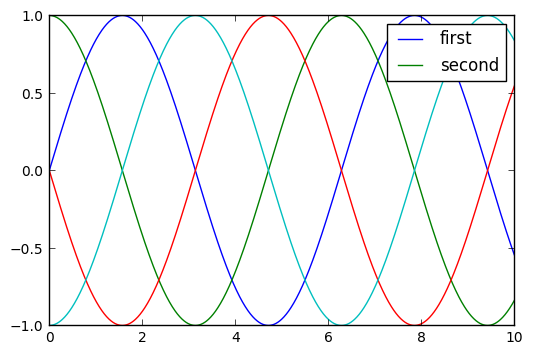

In [51]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0,2,0.50))
lines = plt.plot(x, y)

# lines is a list of plt.2D instances
plt.legend(lines[:2], ['first', 'second']);

__Amore intuitive approach__

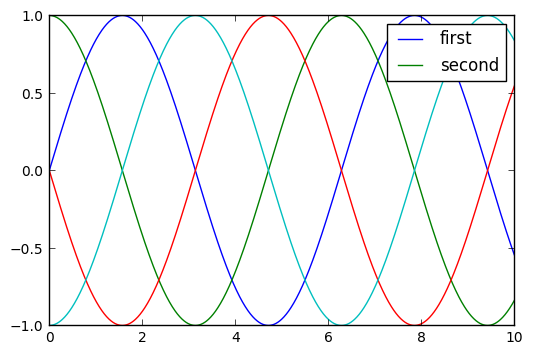

In [62]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=1);

__Notice that by default, the legend ignores all elements without a label attribute set__

### Legends for Size of Points

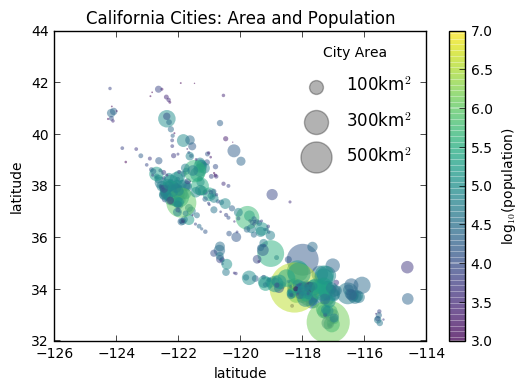

In [85]:
import pandas as pd
cities = pd.read_csv('../Data/california_cities.csv')

# Extract the necessary data
lat,lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# scatter the points,using size and colorbut no label
plt.scatter(lon, lat,label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=0, alpha=0.5)

plt.axis(aspect='equal')
plt.xlabel('latitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')

plt.clim(3, 7)

# legend
# plot empty lists withthedesired size and label
for area in [100, 300,500]:
    plt.scatter([], [], c = 'k', alpha=0.3, s=area,
               label=str(area) + 'km$^2$')
    
plt.legend(scatterpoints=1, frameon=0,
          labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

__*Note the trick here*__:
The legend will always reference some object that is on the plot, so if we’d like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects that are picked up by the legend, and now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

### Multiple Legends

Matplotlib does not make this easy. 
We can work around this by creating a new legend artist from scratch, and then
using the lower-level ax.add_artist() method to manually add the second artist to the plot.

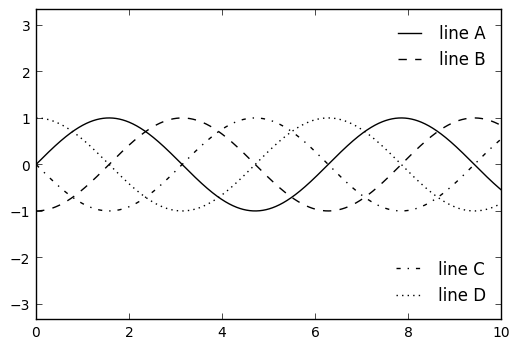

In [92]:
fig, ax = plt.subplots()
lines = []
styles = ['-','--', '-.', ':']
x = np.linspace(0,10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i*np.pi/2),
                    styles[i], color='black')
ax.axis('equal')

# specify the lines and legend of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=0)

# create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc = 'lower right', frameon=0)

ax.add_artist(leg);